<a href="https://colab.research.google.com/github/Sindhura942/DeepLearning/blob/main/Regression_Model_Employees_Salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score ,mean_absolute_error , mean_squared_error
import tensorflow as tf

In [125]:
data = pd.read_csv("Employee_Salary_Data.csv")

In [126]:
X = data['Years_Experience'].values.reshape(-1,1)
Y = data['Annual_Salary'].values.reshape(-1,1)

In [127]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [128]:
X_scaler = StandardScaler()
Y_scaler = StandardScaler()

In [129]:
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
Y_train_scaled = Y_scaler.fit_transform(Y_train)
Y_test_scaled = Y_scaler.transform(Y_test)


In [138]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(65,activation = 'relu', input_shape = (1,)),     #First Hidden Layer
    tf.keras.layers.Dense(17,activation = 'relu'),                         #Second Hidden Layer
    tf.keras.layers.Dense(1)
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [139]:
model.compile(optimizer = 'adam' ,loss = 'mean_squared_error')

In [140]:
model.fit(X_train_scaled,Y_train_scaled , epochs = 100, verbose = 1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.9017
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.8177
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.7317
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.7108 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.6401
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.5848
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.5501
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.5071
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.5002
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.4454
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3866
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.3750
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.3354 
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3030
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2806
Epoch 16/100
2/2 

In [141]:
Y_pred_scaled = model.predict(X_test_scaled)
Y_pred = Y_scaler.inverse_transform(Y_pred_scaled)
Y_test_actual = Y_scaler.inverse_transform(Y_test_scaled)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


In [142]:
rmse = np.sqrt(mean_squared_error(Y_test_actual,Y_pred))
mae = mean_absolute_error(Y_test_actual,Y_pred)
mape = np.mean(np.abs((Y_test_actual - Y_pred)/ Y_test_actual)) * 100
r2 = r2_score(Y_test_actual ,Y_pred)

In [143]:
print("\nModel Performance:")
print("------------------------")
print(f"RMSE: ${rmse: .2f}")
print(f"MAE: ${mae: .2f}")
print(f"MAPE: {mape: .2f}%")
print(f"R2:  {r2: .4f}")


Model Performance:
------------------------
RMSE: $ 647.85
MAE: $ 584.32
MAPE:  0.64%
R2:   0.9993


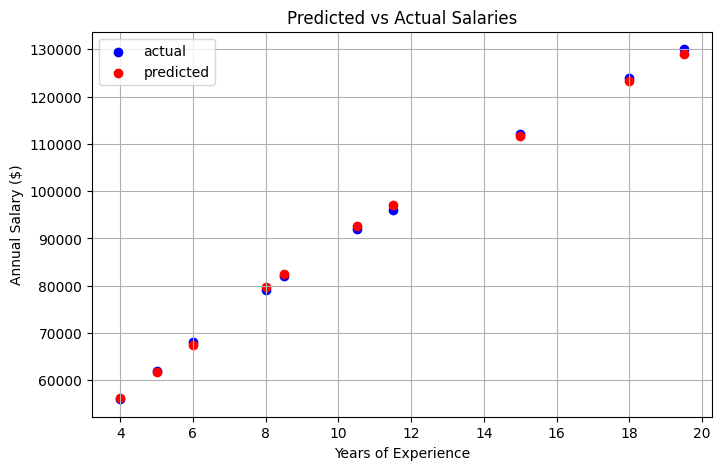

In [144]:
plt.figure(figsize=(8,5))
plt.scatter(X_test,Y_test_actual,color = 'blue', label = 'actual')
plt.scatter(X_test ,Y_pred , color = 'red' , label = 'predicted')
plt.title('Predicted vs Actual Salaries')
plt.xlabel('Years of Experience')
plt.ylabel('Annual Salary ($)')
plt.legend()
plt.grid(True)
plt.show()

In [145]:
#Sample test input (Years of Experience)
X_new = np.array([[21] ,[30], [6.3],[7.9]])
#Scale the input using the same scaler used for training
X_new_scaled = X_scaler.transform(X_new)
#Predict Using the trained model
Y_new_pred_scaled = model.predict(X_new_scaled)
#Inverse transform to get actual salary
Y_new_pred = Y_scaler.inverse_transform(Y_new_pred_scaled)

#print results
for i in range (len(X_new)):
  print(f"Years of Experience: {X_new[i][0]:>5} ---> Predicted Salary :${Y_new_pred[i][0]:,.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Years of Experience:  21.0 ---> Predicted Salary :$134,827.12
Years of Experience:  30.0 ---> Predicted Salary :$168,676.84
Years of Experience:   6.3 ---> Predicted Salary :$69,174.02
Years of Experience:   7.9 ---> Predicted Salary :$79,018.46
